# Sentimental Analysis and Natural Language Processing For Marketing

# Description about the Dataset:
* This dataset comprises of 2500+ reviews of about 100+ Indian Products pertaining to categories like hair and skin care products, clothes, electronic gadgets, etc from an E-commerce platform.

* Column Description
    *   asin : Amazon Standard Identification Number - a unique id for each product on Amazon

     *   name : name of the product

     *   date : date on which review was posted

     *   rating : rating given to the product ( out of 5 )

     *   review: review given to the product

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df=pd.read_csv("amazon_vfl_reviews.csv")

In [3]:
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


#  Exploratory Data Analysis (EDA)

In [4]:
df.isnull()

,asin,name,date,rating,review
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2777,False,False,False,False,False
2778,False,False,False,False,False
2779,False,False,False,False,False
2780,False,False,False,False,False


In [5]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    6
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2782 non-null   object
 1   name    2782 non-null   object
 2   date    2782 non-null   object
 3   rating  2782 non-null   int64 
 4   review  2776 non-null   object
dtypes: int64(1), object(4)
memory usage: 108.8+ KB


In [7]:
df.describe()

,rating
count,2782.000000
mean,3.765636
std,1.577803
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df.dtypes

asin      object
name      object
date      object
rating     int64
review    object
dtype: object

In [9]:
df.shape

(2782, 5)

In [10]:
df.clip()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [11]:
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


# filling null values

In [12]:
df['review'].fillna("no review",inplace=True)

In [13]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [14]:
len(df['name'].unique())

122

In [15]:
df['name'].sample(n=3) #random sample is selected from the dataset

1380            Cinthol-Original-Soap-100g-Pack
1288    Dettol-Disinfectant-Liquid-Menthol-Cool
2288                 Tata-Tea-Premium-North-1kg
Name: name, dtype: object

In [16]:
def get_brand(x):
    return x.split('-')[0]
df['brand'] = df['name'].apply(get_brand) #creating new column in the dataframe named brand

In [17]:
df['brand'].unique() #getting unique values from the column brand 

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [18]:
df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

In [19]:
len(df['brand'].unique())

24

There are 24 unique brands in the dataset 

In [20]:
df['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'NutriChoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [21]:
df['name'].unique()

array(['Mamaearth-Onion-Growth-Control-Redensyl',
       'Mamaearth-Percent-Natural-Berry-Toothpaste',
       'Mamaearth-Natural-Turmeric-Saffron-brightning',
       'Mamaearth-Illuminate-Vitamin-Radiant-Turmeric',
       'Mamaearth-Blemishes-Pigmentation-Blemish-Mulberry',
       'Mamaearth-Face-Wash-100-ml',
       'Mamaearth-Moisturizing-Baby-Bathing-Oatmeal',
       'Godrej-Protekt-Master-Blaster-Handwash',
       'Godrej-No-1-Bathing-Soap-Lime',
       'Godrej-No-1-Bathing-Soap-Turmeric',
       'Godrej-Direct-Cool-Refrigerator-1905-PTDI',
       'Godrej-aer-Pocket-Bathroom-Fragrance',
       'Godrej-Security-Solutions-SEEC9060-Electronic',
       'Godrej-Matic-Spray-Violet-Valley',
       'Godrej-Security-Solutions-Goldilocks-Personal',
       'Godrej-ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Titan-Analog-Black-Dial-Watch-1805NM01',
       'Titan-Analog-White-Dial-Watch-NK1639SL03',
       'Titan-Karishma-Analog-Blue-Watch-1774SM01',
       'Titan-Karishma-Analog-Black-Wa

There are total 122 products in the dataset

##### Analyze the overall sentiment of reviews for each product.

In [22]:
# Group by product name and calculate average rating
avg_rating = df.groupby('name')['rating'].mean()

# Display average rating for each product
print(avg_rating)

name
Amul-Butter-Pasteurised-100g-Pack                   4.1
Amul-Cacao-Chocolate-125g-Pack                      4.9
Amul-Cheese-Slices-200g-Pack                        4.6
Amul-Cow-Ghee-500ml                                 3.5
Amul-Fresh-Cream-250ml                              4.0
                                                   ... 
Titan-Karishma-Analog-Black-NK1578SM04              4.3
Titan-Karishma-Analog-Black-Watch-NK1639SM02        4.5
Titan-Karishma-Analog-Blue-Watch-1774SM01           3.4
Titan-Karishma-Analog-Champagne-Watch-NK1580YL05    4.2
Titan-Octane-Analog-Silver-Watch-NK1650BM03         5.0
Name: rating, Length: 122, dtype: float64


*   ##### Identify the most positively reviewed product.

In [23]:
max_rating_product = avg_rating.idxmax()
max_rating = avg_rating.max()

# Display the most positively reviewed product and its rating
print("Most Positively Reviewed Product:", max_rating_product)
print("Rating:", max_rating)

Most Positively Reviewed Product: Dettol-Disinfectant-Liquid-Menthol-Cool
Rating: 5.0


*   ##### Identify the most negatively reviewed product.

In [24]:
min_rating_product = avg_rating.idxmin()
min_rating = avg_rating.min()

# Display the most negatively reviewed product and its rating
print("Most Negatively Reviewed Product:", min_rating_product)
print("Rating:", min_rating)

Most Negatively Reviewed Product: Godrej-Matic-Spray-Violet-Valley
Rating: 1.3


*   ##### Analyzing the frequency of mentions for brands and products in a dataset.

In [25]:
import plotly.graph_objects as go

# Define shades of pink for the color theme
colors = ['#FFD1DC', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093','#FFA07A', '#FFB6C1', '#FF69B4', '#EE82EE', '#DDA0DD']

# Analyze frequency of mentions for brands and products
sorted_df = df.sort_values(by='rating', ascending=False)

# Retrieve the top brands
top_brands = sorted_df['brand'].value_counts().head(10)

# Retrieve the top products
top_products = sorted_df['name'].value_counts().head(10)

# Create bar plot for top brands with pink color theme
fig_brands = go.Figure(data=[go.Bar(x=top_brands.index, y=top_brands.values, marker_color=colors)])
fig_brands.update_layout(title='Top 10 Brands by Frequency of Mentions',
                         xaxis_title='Brands',
                         yaxis_title='Frequency')
fig_brands.show()

# Create bar plot for top products with pink color theme
fig_products = go.Figure(data=[go.Bar(x=top_products.index, y=top_products.values, marker_color=colors)])
fig_products.update_layout(title='Top 10 Products by Frequency of Mentions',
                           xaxis_title='Products',
                           yaxis_title='Frequency')
fig_products.show()



*   ##### Analyzing sentiment polarity in reviews for the most positively reviewed product and visualizing the sentiment distribution.

Average Sentiment Polarity for 'Dettol-Disinfectant-Liquid-Menthol-Cool': 0.34719357652581345


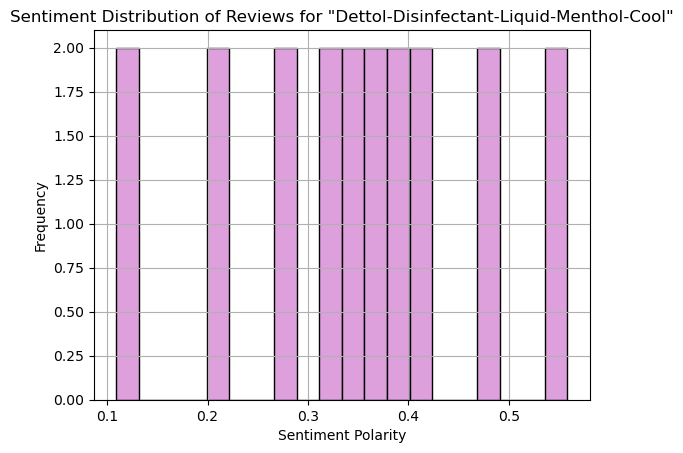

In [26]:
# Filter the DataFrame for the selected product
selected_product_reviews = df[df['name'] == 'Dettol-Disinfectant-Liquid-Menthol-Cool']

# Perform sentiment analysis on the reviews
sentiments = [TextBlob(review).sentiment.polarity for review in selected_product_reviews['review']]

# Calculate average sentiment polarity
avg_sentiment = sum(sentiments) / len(sentiments)

# Display average sentiment polarity for the selected product
print("Average Sentiment Polarity for 'Dettol-Disinfectant-Liquid-Menthol-Cool':", avg_sentiment)

# Visualize sentiment distribution of reviews
plt.hist(sentiments, bins=20, color='#DDA0DD', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Reviews for "Dettol-Disinfectant-Liquid-Menthol-Cool"')
plt.grid(True)
plt.show()

*   ##### Analyzing sentiment polarity in reviews for the most negatively reviewed product and visualizing the sentiment distribution.

Average Sentiment Polarity for 'Godrej-Matic-Spray-Violet-Valley': -0.13048842592592594


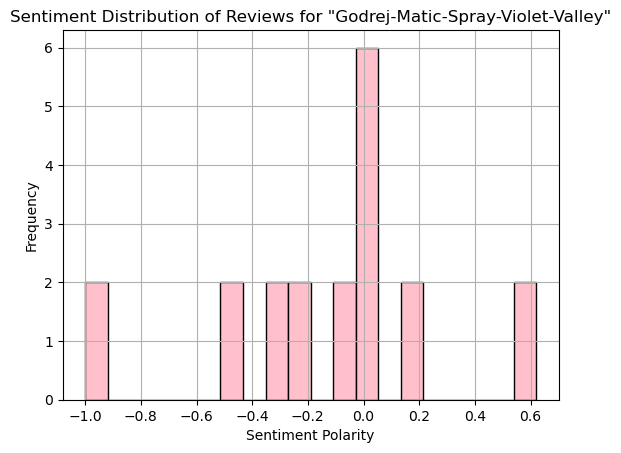

In [27]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Filter the DataFrame for the selected product
selected_product_reviews = df[df['name'] == 'Godrej-Matic-Spray-Violet-Valley']

# Perform sentiment analysis on the reviews
sentiments = [TextBlob(review).sentiment.polarity for review in selected_product_reviews['review']]

# Calculate average sentiment polarity
avg_sentiment = sum(sentiments) / len(sentiments)

# Display average sentiment polarity for the selected product
print("Average Sentiment Polarity for 'Godrej-Matic-Spray-Violet-Valley':", avg_sentiment)

# Visualize sentiment distribution of reviews
plt.hist(sentiments, bins=20, color='pink', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Reviews for "Godrej-Matic-Spray-Violet-Valley"')
plt.grid(True)
plt.show()


*   ##### Analyse and visualize the Rating Distribution

In [28]:
### checking value counts of 'Rating' in Percentage
import plotly.graph_objects as go
import numpy as np
# Get the rating values and their counts
data = df['rating'].value_counts()
keys = data.index.tolist()
count = data.to_list()

# Sort keys and count based on count values
sorted_indexes = np.argsort(count)[::-1]
sorted_keys = [keys[i] for i in sorted_indexes]
sorted_count = [count[i] for i in sorted_indexes]

fig = go.Figure(data=[go.Pie(labels=sorted_keys, values=sorted_count, hole=.3)])
fig.update_layout(
    title_text="Rating Distribution",
    annotations=[dict(text=f"{k} ({v:.1f}%)", x=i, y=v/100, font_size=12, showarrow=False) for i, (k, v) in enumerate(zip(sorted_keys, sorted_count))],
)
fig.update_traces(hoverinfo="label+percent+name", marker=dict(colors=['#FFA07A', '#FFB6C1', '#FF69B4', '#EE82EE', '#DDA0DD']))
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.add_annotation(x=0.5, y=0.5, text="Ratings", font=dict(size=14), showarrow=False, xref="paper", yref="paper")

fig.write_html("pie_chart.html")

from IPython.display import IFrame
IFrame(src="pie_chart.html", width=800,height=800)

*  Conclusion-
From the above we can say that the maximum Rating has been given as 5 to the indian products i.e, approximatly 52% but still there are many customers who are not happy with the products and have given low rating

*   ##### Identify and visualize the top 5 brands with the least number of reviews.

In [29]:
df1 = pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand','count']
sort_df = df1.sort_values(['count'],ascending=True)

fig = px.bar(sort_df.iloc[:5,:],y='brand',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of brands with least number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

*   ##### Display a table showing the top 5 brands with the highest number of reviews.

In [30]:
brand = sort_df.iloc[-5:,:]['brand'].tolist()
count=sort_df.iloc[-5:,:]['count'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Brand','Number of Reviews'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[brand,count],
                            height=30))
                     ])
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

*   ##### Preprocess the text data by removing non-alphabetic characters, converting text to lowercase,removing stopwords, and creating a corpus for further text analysis.

In [31]:
stop_words = stopwords.words('english')

corpus = []
for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

*   ##### Generate a word cloud visualization to visually represent the most frequently occurring words in the corpus of preprocessed text data.

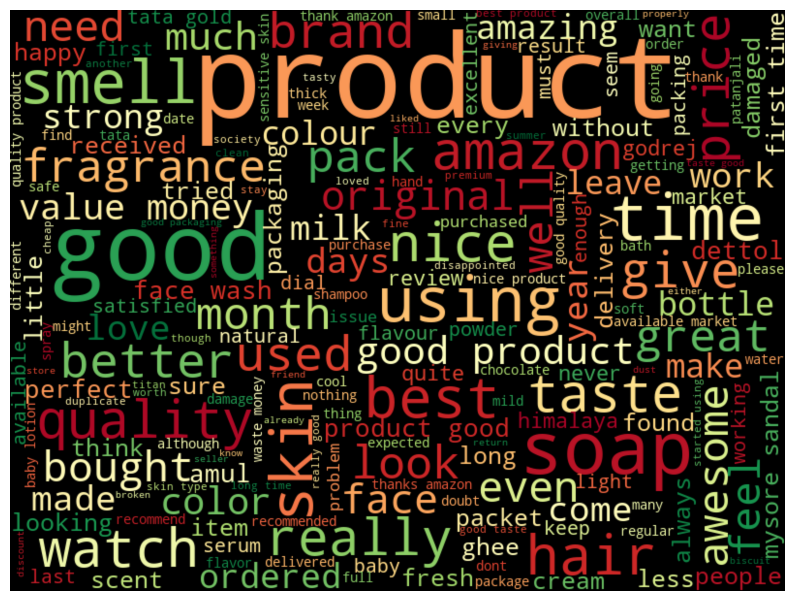

In [32]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

*   ##### Visualize the distribution of ratings given to products based on customer reviews.

In [33]:
rating_df = pd.DataFrame(df['rating'].value_counts().reset_index())
rating_df.columns=['rating','count']

fig = px.bar(rating_df,x='rating',y='count',
            color_discrete_sequence=['pink'])
fig.update_layout(title_text='Distribution of Ratings',title_x=0.5
                  ,template='plotly_dark')
fig.show()

*  A rating of 5 stars has been given to almost 1444 products.
About 19.65% of the products are rated as 1 star.
The least number of products i.e 122 are given 2 star rating.

*   ##### Perform sentiment analysis on customer reviews to determine the polarity of sentiments (positive, negative, or neutral) and assign a polarity score to each review.

In [34]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].\
   map(lambda x: sentiment(x))

*   ##### Visualize the proportion of different sentiment categories (positive, negative, neutral) in the dataset of customer reviews.

In [35]:
fig = go.Figure(data=[go.Pie(labels=df['polarity'].value_counts().index.tolist(),
                             values=df['polarity'].value_counts().tolist(),
                             marker=dict(colors=['#FFA07A', '#FFB6C1', '#FF69B4']))])

fig.update_layout(title_text='Proportion of Sentiments', title_x=0.5,
                  template='plotly_dark')
fig.show()

*  Most of the reviews are Positive.
About 8.42% are Neutral reviews.
Out of 2778 reviews, 410 are Negative.

*   ##### Analyze the correlation between the ratings and polarity score

In [36]:
# Correlation between rating and polarity score
correlation = df['rating'].corr(df['polarity_score'])

print("Correlation between Rating and Polarity Score:", correlation)

Correlation between Rating and Polarity Score: 0.5434953366272096


*   ##### Extract and preprocess text data from a DataFrame based on the sentiment polarity 

In [37]:
def get_data(df,senti):
    s_df = df[df['polarity']==senti].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_df)):
        text = re.sub('[^a-zA-Z]', ' ', s_df['review'][i])
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

p_corpus = get_data(df,'positive')
n_corpus = get_data(df,'negative')
nt_corpus = get_data(df,'neutral')

*   ##### Analyze customer reviews to identify key topics/themes discussed in positive, negative, and neutral sentiments. 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

def lda_analysis(corpus, num_topics=5):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tf = vectorizer.fit_transform(corpus)
    lda_model = LDA(n_components=num_topics, learning_method='online', random_state=42, max_iter=10)
    lda_model.fit(tf)
    for index, topic in enumerate(lda_model.components_):
        print(f'Top 10 words for Topic {index + 1}:')
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
        print()

# Define descriptive labels for topics
topic_labels = ["Customer Service", "Product Quality", "Delivery Experience", "Price Perception", "Overall Satisfaction"]

# Topic modeling for positive reviews
lda_analysis(p_corpus)
print("Descriptive Labels for Positive Review Topics:")
for i, label in enumerate(topic_labels):
    print(f"Topic {i + 1}: {label}")
print()

# Topic modeling for negative reviews
lda_analysis(n_corpus)
print("Descriptive Labels for Negative Review Topics:")
for i, label in enumerate(topic_labels):
    print(f"Topic {i + 1}: {label}")
print()

# Topic modeling for neutral reviews
lda_analysis(nt_corpus)
print("Descriptive Labels for Neutral Review Topics:")
for i, label in enumerate(topic_labels):
    print(f"Topic {i + 1}: {label}")
print()


Top 10 words for Topic 1:
['original', 'buy', 'great', 'sandal', 'like', 'got', 'amazon', 'soap', 'good', 'product']

Top 10 words for Topic 2:
['dettol', 'really', 'good', 'dry', 'use', 'soap', 'face', 'using', 'fragrance', 'skin']

Top 10 words for Topic 3:
['best', 'color', 'nice', 'hair', 'time', 'baby', 'watch', 'good', 'product', 'tea']

Top 10 words for Topic 4:
['time', 'product', 'oil', 'great', 'colour', 'use', 'think', 'like', 'good', 'hair']

Top 10 words for Topic 5:
['nice', 'amazon', 'milk', 'like', 'quality', 'best', 'taste', 'price', 'product', 'good']

Descriptive Labels for Positive Review Topics:
Topic 1: Customer Service
Topic 2: Product Quality
Topic 3: Delivery Experience
Topic 4: Price Perception
Topic 5: Overall Satisfaction

Top 10 words for Topic 1:
['toothpaste', 'given', 'bad', 'watch', 'product', 'products', 'received', 'month', 'taste', 'tea']

Top 10 words for Topic 2:
['mysore', 'bad', 'quality', 'money', 'buy', 'sandal', 'like', 'smell', 'soap', 'produ

*   ##### Prepare separate corpora for positive, negative, and neutral sentiment categories of customer reviews for further analysis.

*   ##### Generate a word cloud visualization to visually represent the most frequently occurring words in the corpus of positive sentiment customer reviews.

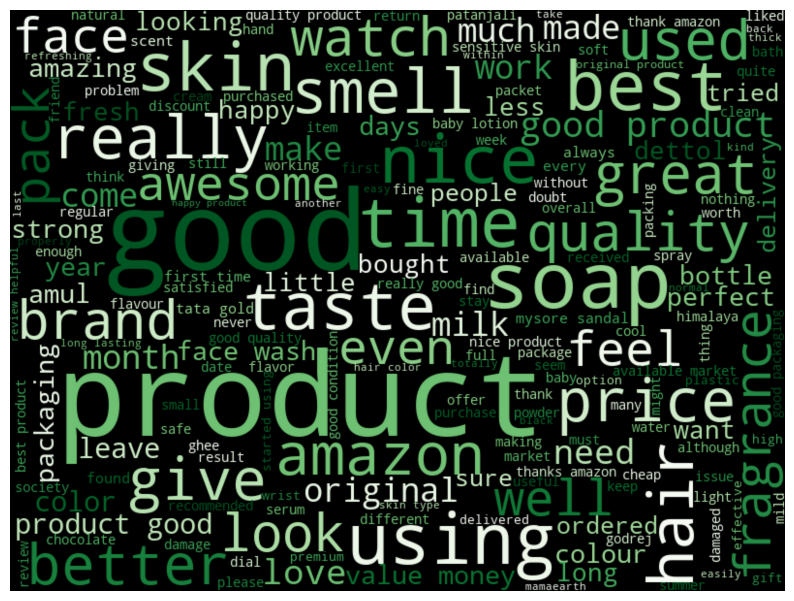

In [39]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Greens', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(p_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

*   ##### Generate a word cloud visualization to visually represent the most frequently occurring words in the corpus of negative sentiment customer reviews.

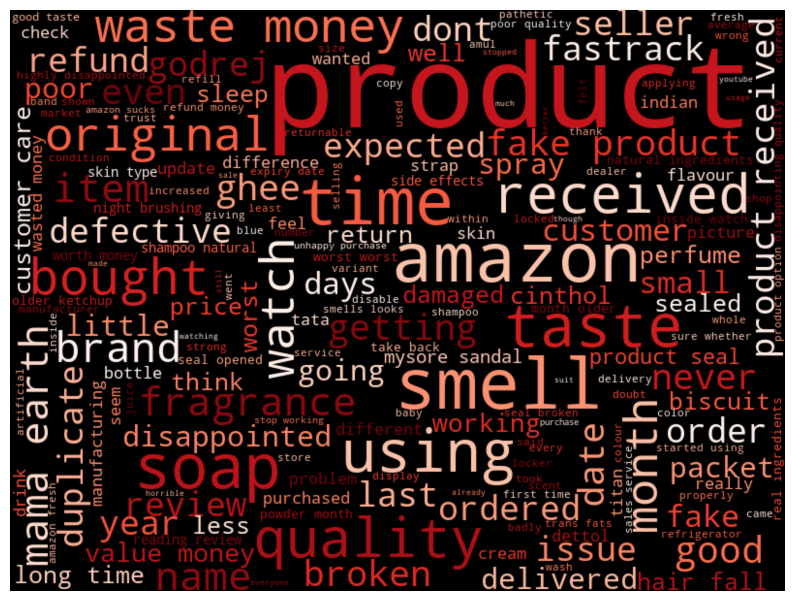

In [40]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Reds', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(n_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

*   ##### Generate a word cloud visualization to visually represent the most frequently occurring words in the corpus of neutral sentiment customer reviews.

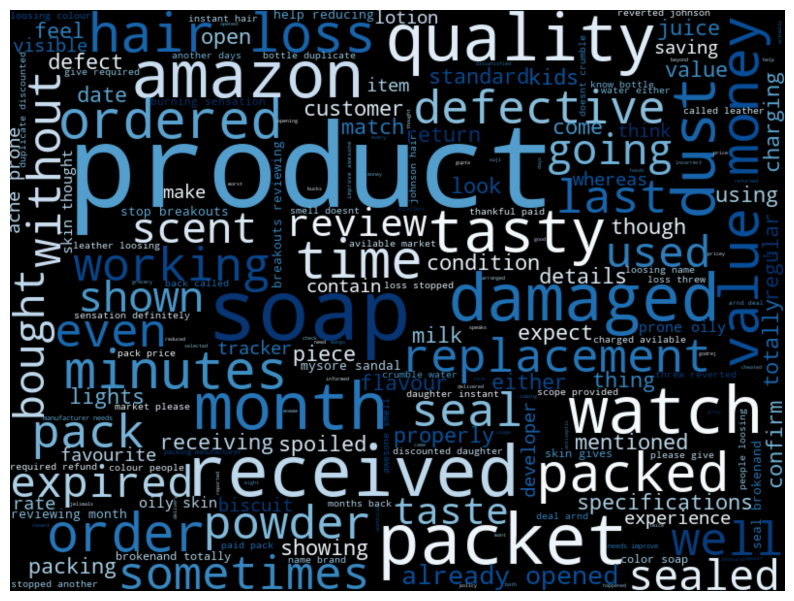

In [41]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(nt_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

*  from the above wordclouds, we can observe that:-

*   Words like good, better, awesome are used to describe the products highlighting a positive sentiment.
For describing negative sentiments, words used are fake, waste.

In [42]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
corpus = []
for review in df['review']:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

# Convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = df['polarity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 97.48653500897666
Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.95      0.94        78
     neutral       0.91      0.96      0.94        54
    positive       0.99      0.98      0.99       425

    accuracy                           0.97       557
   macro avg       0.95      0.96      0.96       557
weighted avg       0.98      0.97      0.98       557



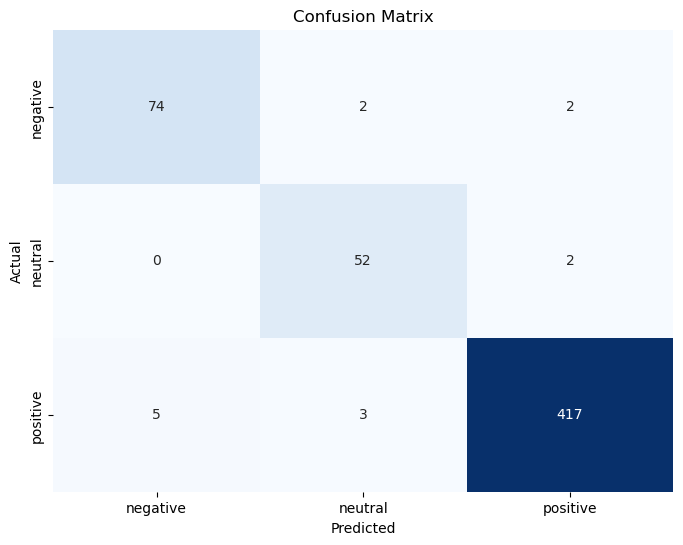

In [43]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [44]:
# Train Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Calculate Impact Factor
# Predict sentiment for each brand's reviews and calculate impact factor
brands = df['brand'].unique()
impact_factors = {}
for brand in brands:
    brand_reviews = df[df['brand'] == brand]
    X_brand = tfidf_vectorizer.transform(brand_reviews['review'])
    predicted_sentiments = decision_tree_classifier.predict(X_brand)
    # Adjust the labels based on what the classifier predicts
    positive_count = (predicted_sentiments == 'positive').sum()
    negative_count = (predicted_sentiments == 'negative').sum()
    neutral_count = (predicted_sentiments == 'neutral').sum()
    total_reviews = len(brand_reviews)
    impact_factors[brand] = {
        'positive': positive_count / total_reviews,
        'negative': negative_count / total_reviews,
        'neutral': neutral_count / total_reviews
    }

# Step 6: Analysis and Interpretation
# Analyze impact factors for each brand
for brand, impact_factor in impact_factors.items():
    print(f"Impact Factor for {brand}:")
    print(f"Positive: {impact_factor['positive']:.2f}")
    print(f"Negative: {impact_factor['negative']:.2f}")
    print(f"Neutral: {impact_factor['neutral']:.2f}")
    print()

Accuracy: 98.20466786355476
Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.97      0.97        78
     neutral       0.95      0.96      0.95        54
    positive       0.99      0.99      0.99       425

    accuracy                           0.98       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.98      0.98      0.98       557

Impact Factor for Mamaearth:
Positive: 0.80
Negative: 0.17
Neutral: 0.03

Impact Factor for Godrej:
Positive: 0.76
Negative: 0.18
Neutral: 0.06

Impact Factor for Titan:
Positive: 0.83
Negative: 0.06
Neutral: 0.11

Impact Factor for Maaza:
Positive: 0.60
Negative: 0.20
Neutral: 0.20

Impact Factor for Paper:
Positive: 0.70
Negative: 0.15
Neutral: 0.15

Impact Factor for Indiana:
Positive: 1.00
Negative: 0.00
Neutral: 0.00

Impact Factor for Coca:
Positive: 0.80
Negative: 0.20
Neutral: 0.00

Impact Factor for Natural:
Positive: 0.65
Negative: 0.20
Neutral: 0.15



In [45]:
#234 #345 

In [46]:
# Example review index
example_index = 269

# Example review
example_review = df['review'][example_index]

# Preprocess the review
processed_review = ' '.join([word.lower() for word in re.sub('[^a-zA-Z]', ' ', example_review).split() if word.lower() not in stop_words])

# Actual rating
actual_rating = df['rating'][example_index]

# Convert the processed review into numerical features and predict the sentiment using the decision tree classifier
predicted_sentiment = decision_tree_classifier.predict(tfidf_vectorizer.transform([processed_review]))[0]

print("Review:", example_review)
print("Actual Rating:", actual_rating)
print("Predicted Sentiment:", predicted_sentiment)


Review: I did exchange with BEST Price in the market and everything went well, no doubt about that, In fact, Product delivered on promised date,  and the quality is too good.
Actual Rating: 5
Predicted Sentiment: positive
